# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [3]:
# Run this cell without changes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [4]:
# Your code here
heroes_df=pd.read_csv("heroes_information.csv",index_col=0)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

The following code checks that the dataframe was loaded correctly.

In [5]:
# Run this cell without changes

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == ['name', 'Gender', 'Eye color', 'Race',
 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [6]:
# Your code here
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [7]:
# Run this cell without changes
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [8]:
heroes_df.isna().sum()[heroes_df.isna().sum()>0]

Publisher    15
Weight        2
dtype: int64

In [9]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [10]:
heroes_df['Race'].value_counts()

-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
                    ... 
Flora Colossus         1
Spartoi                1
Gorilla                1
Zombie                 1
Yoda's species         1
Name: Race, Length: 62, dtype: int64

In [11]:
heroes_df['Race'].value_counts(normalize=True)

-                    0.414169
Human                0.283379
Mutant               0.085831
God / Eternal        0.019074
Human / Radiation    0.014986
                       ...   
Flora Colossus       0.001362
Spartoi              0.001362
Gorilla              0.001362
Zombie               0.001362
Yoda's species       0.001362
Name: Race, Length: 62, dtype: float64

In [12]:
heroes_df['Skin color'].value_counts()

-                 662
green              21
red                 9
blue                9
white               7
silver              5
grey                5
gold                3
purple              3
pink                2
yellow              2
black               1
red / black         1
orange / white      1
orange              1
blue-white          1
gray                1
Name: Skin color, dtype: int64

In [13]:
heroes_df['Skin color'].value_counts(normalize=True)

-                 0.901907
green             0.028610
red               0.012262
blue              0.012262
white             0.009537
silver            0.006812
grey              0.006812
gold              0.004087
purple            0.004087
pink              0.002725
yellow            0.002725
black             0.001362
red / black       0.001362
orange / white    0.001362
orange            0.001362
blue-white        0.001362
gray              0.001362
Name: Skin color, dtype: float64

In [14]:
print(heroes_df.name.value_counts()[heroes_df.name.value_counts()>1])
print(len(heroes_df.name.value_counts()[heroes_df.name.value_counts()>1]))

Goliath           3
Spider-Man        3
Nova              2
Vindicator        2
Toxin             2
Batman            2
Batgirl           2
Atom              2
Speedy            2
Black Canary      2
Blue Beetle       2
Angel             2
Atlas             2
Blizzard          2
Captain Marvel    2
Namor             2
Firestorm         2
Name: name, dtype: int64
17


In [15]:
heroes_df[heroes_df.name=='Spider-Man']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
622,Spider-Man,Male,hazel,Human,Brown,178.0,Marvel Comics,-,good,74.0
623,Spider-Man,-,red,Human,Brown,178.0,Marvel Comics,-,good,77.0
624,Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,-,good,56.0


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [ ]:
# Replace None with appropriate text
"""
The heroes_df dataset contains 734 rows and 10 columns.
Each row represents a superhero and each column represents various attributes of the superhero (eg, height, weight).

Running a value_counts on hero name, it seems that there are 17 instances of duplicate names (eg, two 'Spider-Man' records).
Looking at these 'Spider-Man' records, they share the same publisher but have different characteristics.
These records may represent 'Spider-Man' character in different years?
So we can't assume the name record would constitute a unique primary key.

At first glance, there seems to be only a small number of nulls within the Publisher (15) and Weight (2) columns.
However, on closer inspection, the columns Race and Skin color have "-" for a large number of nulls.
Specifically, the columns Race and Skin color have "-" for 304 (~40% of total) and 662 (~90%) of values, respectively. 

Turning to datatypes, columns that would logically be numbers (Height, Weight) are datatype float64.
Other columns are categorical and are datatype object which makes sense.
"""

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [16]:
# Your code here (create more cells as needed)
powers_df=pd.read_csv("super_hero_powers.csv",index_col=0)
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


The following code will check if it was loaded correctly:

In [17]:
# Run this cell without changes

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == '3-D Man'

# The last column should be 'Zoom'
assert powers_df.columns[-1] == 'Zoom'

# The first index should be 'Agility'
assert powers_df.index[0] == 'Agility'

# The last index should be 'Omniscient'
assert powers_df.index[-1] == 'Omniscient'

In [18]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB


In [19]:
len(powers_df)

167

In [21]:
len(powers_df.columns)

667

In [325]:
powers_df.isna().sum()

3-D Man            0
A-Bomb             0
Abe Sapien         0
Abin Sur           0
Abomination        0
                  ..
Yellowjacket II    0
Ymir               0
Yoda               0
Zatanna            0
Zoom               0
Length: 667, dtype: int64

In [ ]:
"""
The powers_df dataset contains 167 rows and 667 columns -- more columns than rows, which seems unusual. 
(The heroes_df dataset, by comparison, contains 734 rows and 10 columns.)
Each row of the powers_df dataset represents a superpower.
Columns represent superhero names (a potential key link between the two datasets).
Each superhero name column contains a True/False boolean on whether the superhero has the attribute in that row.
There do not appear to be any null datapoints.
This dataframe is structured in a unique way, unlike the heroes_df.
"""

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [22]:
# Run this cell without changes
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(5, random_state=1)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [23]:
# Run this cell without changes
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(5, random_state=1)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


In [328]:
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Shueisha               4
ABC Studios            4
IDW Publishing         4
Icon Comics            4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
J. K. Rowling          1
Titan Books            1
Hanna-Barbera          1
South Park             1
Universal Studios      1
Rebellion              1
J. R. R. Tolkien       1
Microsoft              1
Name: Publisher, dtype: int64

In [24]:
heroes_df["Publisher"].isna().sum()

15

In [25]:
heroes_df["Publisher"].isna().value_counts(normalize=True)

False    0.979564
True     0.020436
Name: Publisher, dtype: float64

In [26]:
heroes_df[heroes_df["Publisher"].isna()].sort_values(by='name')

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [ ]:
# Replace None with appropriate text
"""
Chose to drop the missing rows since:
a) comprise only ~2% of datapoints,
b) publisher field type is categorical (can't be filled with a numerical proxy value via mean/median), and
c) superhero names don't logically belong with any given stated publisher.
"""

Now, implement your chosen strategy using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [27]:
# Your code here
heroes_df=heroes_df[heroes_df["Publisher"].notna()]

In [28]:
#confirming nulls now excluded from dataframe
heroes_df.isna().sum().sum()

0

Now there should be no missing values in the publisher column:

In [29]:
# Run this cell without changes
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [30]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Shueisha               4
IDW Publishing         4
ABC Studios            4
Icon Comics            4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
J. K. Rowling          1
J. R. R. Tolkien       1
Rebellion              1
Universal Studios      1
South Park             1
Microsoft              1
Titan Books            1
Hanna-Barbera          1
Name: Publisher, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [ ]:
# Replace None with appropriate text
"""
'DC Comics' v ' DC Comics'
'Marvel Comics' v 'Marvel'
"""

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [31]:
# Your code here
heroes_df["Publisher"] = heroes_df["Publisher"].map(lambda x: x.strip())

<ipython-input-31-219b4b8add21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes_df["Publisher"] = heroes_df["Publisher"].map(lambda x: x.strip())


In [32]:
heroes_df["Publisher"]=np.where(heroes_df["Publisher"]=='Marvel','Marvel Comics',heroes_df["Publisher"])

<ipython-input-32-6e3da5cc61c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes_df["Publisher"]=np.where(heroes_df["Publisher"]=='Marvel','Marvel Comics',heroes_df["Publisher"])


Check your work below:

In [33]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Shueisha               4
Icon Comics            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
South Park             1
Titan Books            1
Rebellion              1
Hanna-Barbera          1
Microsoft              1
J. K. Rowling          1
J. R. R. Tolkien       1
Universal Studios      1
Name: Publisher, dtype: int64

### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

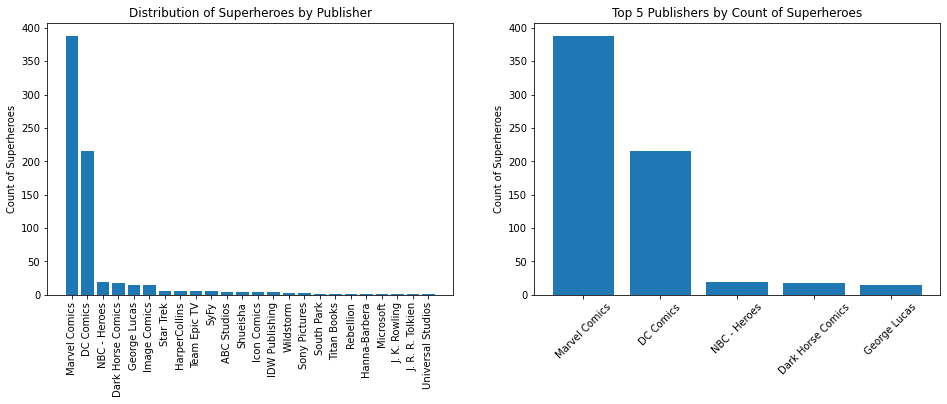

In [34]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [35]:
# Run this cell without changes
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [36]:
# Run this cell without changes
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [240]:
# Replace None with appropriate text
"""
The datasets share the common key superhero name.
This key is represented by the column name in heroes_df.
However, in powers_df, this key is represented as a series of columns each containing a superhero name.
We first need to flip the powers_df table so that the superhero name becomes a column itself.
We can then join the tables.
Inner join is probably better than left join since the inner join will retain only records with matching keys.
Will use .join method instead of .merge initially since .join requires explicit same-name index key columns. 
"""

'\nThe datasets share the common key superhero name.\nThis key is represented by the column name in heroes_df.\nHowever, in powers_df, this key is represented as a series of columns each containing a superhero name.\nWe first need to flip the powers_df table so that the superhero name becomes a column itself.\nWe can then join the tables.\nInner join is probably better than left join since the inner join will retain only records with matching keys.\n'

In [37]:
#flip powers_df
powers_df_flip=powers_df.T
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#reset index
powers_df_flip=powers_df_flip.reset_index()

In [39]:
powers_df_flip.head()

,index,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
#set index to index
powers_df_flip=powers_df_flip.set_index('index')
powers_df_flip

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
index,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [41]:
#rename index to name since matching col names required for .join
powers_df_flip.index.name="name"

In [42]:
powers_df_flip

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [43]:
heroes_df=heroes_df.set_index('name')
heroes_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0


In [44]:
#using .join
heroes_and_powers_df=heroes_df.join(powers_df_flip,how="inner")

In [45]:
#using .merge
heroes_and_powers_df=heroes_df.merge(powers_df_flip,on="name",how="inner")

Run the code below to check your work:

In [46]:
# Run this cell without changes

# Confirms you have created a dataframe with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you mgith need to 
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

In [47]:
heroes_and_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
heroes_and_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 156.1+ KB


In [49]:
heroes_and_powers_df.describe()

,Height,Weight
count,647.000000,647.000000
mean,115.539413,54.537867
std,135.106175,131.526327
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,178.000000,68.000000
75%,188.000000,95.000000
max,975.000000,900.000000


In [50]:
heroes_and_powers_df.index.value_counts()

Spider-Man      3
Speedy          2
Atlas           2
Namor           2
Batman          2
               ..
Adam Strange    1
Luna            1
Bling!          1
Destroyer       1
Harry Potter    1
Name: name, Length: 630, dtype: int64

In [51]:
heroes_and_powers_df.loc['Spider-Man']

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Spider-Man,Male,hazel,Human,Brown,178.0,Marvel Comics,-,good,74.0,True,...,True,False,False,False,False,False,False,False,False,False
Spider-Man,-,red,Human,Brown,178.0,Marvel Comics,-,good,77.0,True,...,True,False,False,False,False,False,False,False,False,False
Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,-,good,56.0,True,...,True,False,False,False,False,False,False,False,False,False


In [52]:
powers_df_flip.loc['Spider-Man'][powers_df_flip.loc['Spider-Man']==True]

Agility                         True
Accelerated Healing             True
Durability                      True
Stealth                         True
Danger Sense                    True
Marksmanship                    True
Animal Attributes               True
Super Strength                  True
Stamina                         True
Super Speed                     True
Animal Oriented Powers          True
Enhanced Senses                 True
Jump                            True
Reflexes                        True
Substance Secretion             True
Natural Weapons                 True
Toxin and Disease Resistance    True
Wallcrawling                    True
Vision - Night                  True
Web Creation                    True
Name: Spider-Man, dtype: bool

In [53]:
powers_df_flip.loc['Spider-Man'][~powers_df_flip.loc['Spider-Man']==True]

Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Energy Absorption        False
Flight                   False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Name: Spider-Man, Length: 147, dtype: bool

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [54]:
# Run this cell without changes

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum([heroes_and_powers_df[power_name] for power_name in powers_df.index])
heroes_and_powers_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,7
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,16
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,8
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,False,...,False,False,False,False,False,False,False,False,False,3
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,6
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,19


In [55]:
powers_df.index

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [56]:
sum(heroes_and_powers_df['Agility'])

236

In [57]:
heroes_and_powers_df.loc[['Spider-Man'],['Power Count']]

,Power Count
name,
Spider-Man,20
Spider-Man,20
Spider-Man,20


### Answering the Question

Now we can plot the height vs. the count of powers:

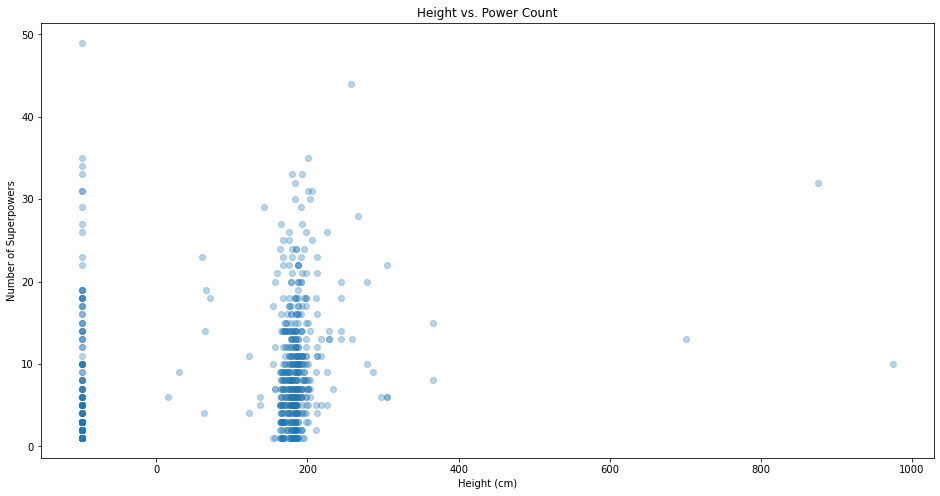

In [58]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"],
    y=heroes_and_powers_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [59]:
# Run this cell without changes
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
Chameleon,Male,-,-,-,-99.0,DC Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,1
Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,4
Luna,Female,-,Human,-,-99.0,Marvel Comics,-,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,1
JJ Powell,Male,-,-,-,-99.0,ABC Studios,-,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,1
Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0,True,...,False,False,False,False,False,False,False,False,False,7


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [60]:
# Run this cell without changes
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,7
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,16
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,8
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,False,...,False,False,False,False,False,False,False,False,False,3
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,6
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,19


### Answering the Question, Again

Now we can redo that plot without those negative heights:

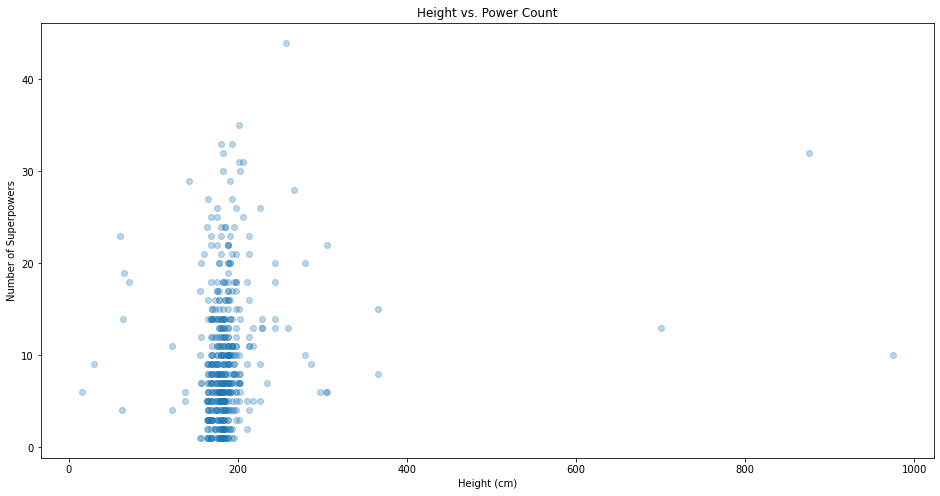

In [61]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=question_2_df["Height"],
    y=question_2_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

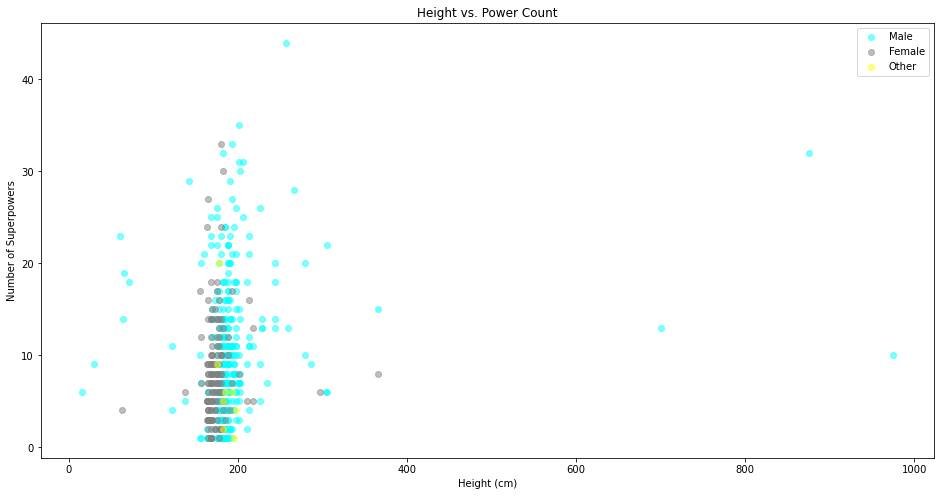

In [62]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[(question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male"
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female"
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other"
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

In [63]:
#Create a copy for backup
question_3_df=heroes_and_powers_df.copy()
question_3_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,7
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,16
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,8
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,14


In [64]:
#filter df records to isolate specified publishers
question_3_df=question_3_df[(question_3_df['Publisher']=='Marvel Comics') | (question_3_df['Publisher']=='DC Comics')]
question_3_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,7
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,8
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,14
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,11


In [65]:
#we need these columns in the final table
list(powers_df.index)

['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

In [66]:
#as well as the publisher column
target_columns=list(powers_df.index)
target_columns.append('Publisher')

In [67]:
#confirming this is the list of columns we want
target_columns

['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

In [68]:
#feeding targeted columns into question_3_df and confirming result contains only desired publishers
question_3_df[target_columns].Publisher.value_counts()

Marvel Comics    341
DC Comics        196
Name: Publisher, dtype: int64

In [69]:
#persisting question_3_df with only desired columns
question_3_df=question_3_df[target_columns]
question_3_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Publisher
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,DC Comics
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics


In [70]:
#grouping by publisher and flipping
question_3_df=question_3_df.groupby('Publisher').sum().T
question_3_df

Publisher,DC Comics,Marvel Comics
Agility,71,126
Accelerated Healing,51,100
Lantern Power Ring,11,0
Dimensional Awareness,7,16
Cold Resistance,15,25
...,...,...
Phoenix Force,0,1
Molecular Dissipation,1,0
Vision - Cryo,1,0
Omnipresent,0,1


In [71]:
#setting index name to appropriate name
question_3_df.index.name="Superpower Name"
question_3_df

Publisher,DC Comics,Marvel Comics
Superpower Name,,
Agility,71,126
Accelerated Healing,51,100
Lantern Power Ring,11,0
Dimensional Awareness,7,16
Cold Resistance,15,25
...,...,...
Phoenix Force,0,1
Molecular Dissipation,1,0
Vision - Cryo,1,0


In [72]:
#reseting index
question_3_df=question_3_df.reset_index()

In [73]:
#removing name on index to match desired table format
question_3_df.columns.name = None

In [74]:
question_3_df

,Superpower Name,DC Comics,Marvel Comics
0,Agility,71,126
1,Accelerated Healing,51,100
2,Lantern Power Ring,11,0
3,Dimensional Awareness,7,16
4,Cold Resistance,15,25
...,...,...,...
162,Phoenix Force,0,1
163,Molecular Dissipation,1,0
164,Vision - Cryo,1,0
165,Omnipresent,0,1


The code below checks that you have the correct dataframe structure:

In [75]:
# Run this cell without changes

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == ['DC Comics', 'Marvel Comics', 'Superpower Name']

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [76]:
# Run this cell without changes

marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]
marvel_most_common

,Superpower Name,Marvel Comics
17,Super Strength,204
5,Durability,154
25,Stamina,150
30,Super Speed,137
0,Agility,126


In [77]:
# Run this cell without changes

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

,Superpower Name,DC Comics
17,Super Strength,109
25,Stamina,90
8,Flight,86
30,Super Speed,79
5,Durability,71


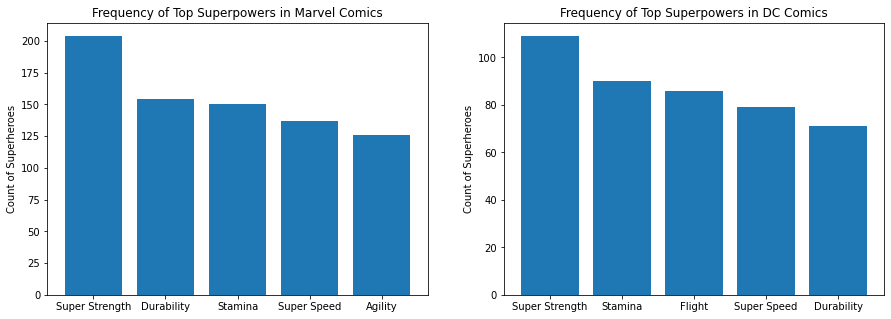

In [78]:
# Run this cell without changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"],
    height=marvel_most_common["Marvel Comics"]
)
ax2.bar(
    x=dc_most_common["Superpower Name"],
    height=dc_most_common["DC Comics"]
)

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

In [541]:
# Replace None with appropriate text:
"""

Question:
What is the distribution of superhero powers by the heaviest and lightest weight tiers?

Logic:
Do the heaviest superheroes have different kinds of powers from the lightest superheroes?
If so, is there a logical connection between their heaviness or lightness and nature of these powers?

Method:
Made a copy of the pro forma table.
Excluded n=180 records with negative weight values.
Initiated a helper function, weight_tier, to bucket heroes into 4 weight tiers depending on quantile.
The heaviest heroes were assigned weight tier #1 (75+% weight quantile) while lighest tier #4 (<25%).
Targeted columns were identified (superhero powers plus newly-created weight_tier).
Summary table was created displaying sum of superheros by superpower for each weight tier.
These tiers were then sorted and the results for tier #1 (heaviest) and tier #4 (lightest) analyzed.
Bar charts were created to visualize the results.

Conclusion:
The heaviest heroes were weighted more towards Super Strength and Durability than the lightest heroes, which makes sense.
But surprisingly, the heaviest superheroes also had Super Speed, Stamina, and Agility.
I would have expected the lighest superheroes to skew much more towards Super Speed, Stamina, and Agility.
Instead, the data was inconclusive.
The lighter superheros did have a Flight factor in their Top 5, but Flight was still in the heaviest heroes top 10.

The heaviest superheros had top 5 superpowers as follows: 
Super Strength: 107
Durability: 88
Stamina: 84
Super Speed: 67
Agility: 51

The lightest superheros had top 5 superpowers as follows: 
Agility: 48
Super Strength: 48
Stamina: 41
Flight: 40
Super Speed:36

"""

'\nTBD\n'

In [79]:
#making a copy of pro forma table
quest5=heroes_and_powers_df.copy()
quest5.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,7
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,16
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,8
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,14


In [80]:
#observe n=180 negative Weight values which need to be addressed
quest5['Weight'].value_counts()

-99.0     180
 81.0      22
 79.0      21
 54.0      20
 90.0      19
         ... 
 176.0      1
 198.0      1
 76.0       1
 105.0      1
 14.0       1
Name: Weight, Length: 132, dtype: int64

In [81]:
#exclude negative Weight values from dataset
#observe new Weight distribution ex de facto nulls
quest_5=quest5[quest5['Weight']>0]
quest_5.describe().sort_values('Weight',ascending=False)

,Height,Weight,Power Count
max,975.000000,900.000000,44.000000
count,467.000000,467.000000,467.000000
mean,184.639615,113.717345,9.706638
75%,188.000000,107.000000,13.000000
std,66.981735,106.610243,7.142451
50%,183.000000,81.000000,8.000000
25%,173.000000,61.000000,5.000000
min,-99.000000,2.000000,1.000000


In [82]:
#define helper function to create weight tiers for analysis based on weight quantiles
def weight_tier(weight):
    if weight>=quest_5['Weight'].quantile(0.75):
        return 1
    elif weight>=quest_5['Weight'].quantile(0.50):
        return 2
    elif weight>=quest_5['Weight'].quantile(0.25):
        return 3
    else:
        return 4

In [83]:
#create new weight tier column to bucket data
quest_5['Weight Tier']=[weight_tier(i) for i in quest_5['Weight']]

<ipython-input-83-b21b81f8151b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quest_5['Weight Tier']=[weight_tier(i) for i in quest_5['Weight']]


In [89]:
#isolating desired columns, including newly-created Weight Tier
desired_columns=list(powers_df.index)
desired_columns.append('Weight Tier')
sorted(desired_columns)

['Accelerated Healing',
 'Adaptation',
 'Agility',
 'Animal Attributes',
 'Animal Control',
 'Animal Oriented Powers',
 'Animation',
 'Anti-Gravity',
 'Astral Projection',
 'Astral Travel',
 'Audio Control',
 'Banish',
 'Biokinesis',
 'Camouflage',
 'Changing Armor',
 'Clairvoyance',
 'Cloaking',
 'Cold Resistance',
 'Cryokinesis',
 'Danger Sense',
 'Darkforce Manipulation',
 'Death Touch',
 'Density Control',
 'Dexterity',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Duplication',
 'Durability',
 'Echolocation',
 'Elasticity',
 'Electrical Transport',
 'Electrokinesis',
 'Element Control',
 'Elemental Transmogrification',
 'Empathy',
 'Energy Absorption',
 'Energy Armor',
 'Energy Beams',
 'Energy Blasts',
 'Energy Constructs',
 'Energy Manipulation',
 'Energy Resistance',
 'Enhanced Hearing',
 'Enhanced Memory',
 'Enhanced Senses',
 'Enhanced Sight',
 'Enhanced Smell',
 'Enhanced Touch',
 'Fire Control',
 'Fire Resistance',
 'Flight',
 'Force Fields',
 'Gliding',
 'Gravity Cont

In [90]:
#creating new dataframe filtered for desired columns
quest_5_filtered=quest_5[desired_columns]
quest_5_filtered.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Weight Tier
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1


In [120]:
#summary table displaying summed superpowers per weight tier
quest_5_summary=quest_5_filtered.groupby('Weight Tier').sum().T
quest_5_summary.columns.name = None
quest_5_summary

,1,2,3,4
Agility,51,53,43,48
Accelerated Healing,50,34,36,20
Lantern Power Ring,2,5,1,0
Dimensional Awareness,3,5,2,3
Cold Resistance,22,7,8,3
...,...,...,...,...
Phoenix Force,0,0,0,1
Molecular Dissipation,0,0,0,0
Vision - Cryo,1,0,0,0
Omnipresent,0,0,0,0


In [123]:
#powers sorted by tier=1 (heaviest)
quest_5_summary.sort_values(1,ascending=False).head(10)

,1,2,3,4
Super Strength,107,71,52,48
Durability,88,52,42,29
Stamina,84,61,45,41
Super Speed,67,55,41,36
Agility,51,53,43,48
Accelerated Healing,50,34,36,20
Reflexes,48,41,27,31
Invulnerability,45,18,13,10
Longevity,38,26,14,15
Flight,35,47,35,40


In [124]:
#powers sorted by tier=2
quest_5_summary.sort_values(2,ascending=False).head(10)

,1,2,3,4
Super Strength,107,71,52,48
Stamina,84,61,45,41
Super Speed,67,55,41,36
Agility,51,53,43,48
Durability,88,52,42,29
Flight,35,47,35,40
Reflexes,48,41,27,31
Energy Blasts,26,40,21,26
Accelerated Healing,50,34,36,20
Marksmanship,15,31,27,19


In [127]:
#powers sorted by tier=3
quest_5_summary.sort_values(3,ascending=False).head(10)

,1,2,3,4
Super Strength,107,71,52,48
Stamina,84,61,45,41
Agility,51,53,43,48
Durability,88,52,42,29
Super Speed,67,55,41,36
Accelerated Healing,50,34,36,20
Flight,35,47,35,40
Intelligence,32,29,28,29
Reflexes,48,41,27,31
Marksmanship,15,31,27,19


In [126]:
#powers sorted by tier=4 (lightest)
quest_5_summary.sort_values(4,ascending=False).head(10)

,1,2,3,4
Agility,51,53,43,48
Super Strength,107,71,52,48
Stamina,84,61,45,41
Flight,35,47,35,40
Super Speed,67,55,41,36
Reflexes,48,41,27,31
Durability,88,52,42,29
Intelligence,32,29,28,29
Stealth,21,24,24,27
Energy Blasts,26,40,21,26


In [166]:
heaviest_quantile = quest_5_summary.drop([2,3,4], axis=1)
heaviest_quantile = heaviest_quantile.sort_values(by=1, ascending=False)[:5]
heaviest_quantile.index.name="Superpower Name"
heaviest_quantile

,1
Superpower Name,
Super Strength,107
Durability,88
Stamina,84
Super Speed,67
Agility,51


In [167]:
lightest_quantile = quest_5_summary.drop([1,2,3],axis=1)
lightest_quantile = lightest_quantile.sort_values(by=4, ascending=False)[:5]
lightest_quantile.index.name="Superpower Name"
lightest_quantile

,4
Superpower Name,
Agility,48
Super Strength,48
Stamina,41
Flight,40
Super Speed,36


In [161]:
lightest_quantile[4]

Superpower Name
Agility           48
Super Strength    48
Stamina           41
Flight            40
Super Speed       36
Name: 4, dtype: int64

In [152]:
heaviest_quantile.index

Index(['Super Strength', 'Durability', 'Stamina', 'Super Speed', 'Agility',
       'Accelerated Healing', 'Reflexes', 'Invulnerability', 'Longevity',
       'Flight'],
      dtype='object', name='Superpower Name')

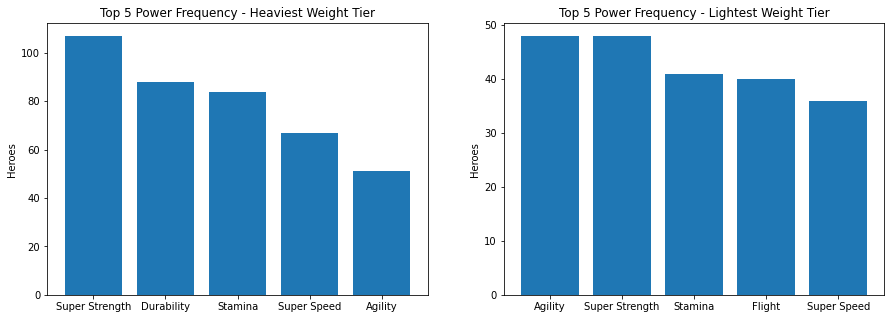

In [171]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=heaviest_quantile.index,
    height=heaviest_quantile[1]
)
ax2.bar(
    x=lightest_quantile.index,
    height=lightest_quantile[4]
)

ax1.set_ylabel("Heroes")
ax2.set_ylabel("Heroes")
ax1.set_title("Top 5 Power Frequency - Heaviest Weight Tier")
ax2.set_title("Top 5 Power Frequency - Lightest Weight Tier");

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!